In [82]:
import json
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib
import seaborn as sns
%matplotlib inline


In [83]:
with open('eval_tim_jet_med.json', 'r') as f:
    data = json.load(f)

In [84]:
data
times = list(data.values())
names = list(data.keys())

In [85]:
queries = pd.read_csv("times.csv")
queries_val = list(queries.values)
queries_col = list(queries.columns)

In [86]:
ACC = [69.57,76.15,77.37,77.63,78.51, 72,77,80.1,82.9,84]

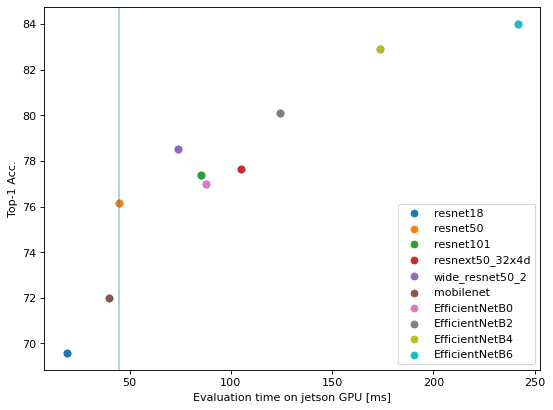

In [87]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(times,ACC)
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan"]
for col,a,t,n in zip(colors,ACC,times,names):
    plt.scatter(t,a,label=n,c=col)
plt.xlabel("Evaluation time on jetson GPU [ms]")
plt.axvline(x=times[1], alpha = 0.4)
plt.legend()
plt.ylabel("Top-1 Acc.");

Text(0, 0.5, 'Evaluation time on jetson GPU [ms]')

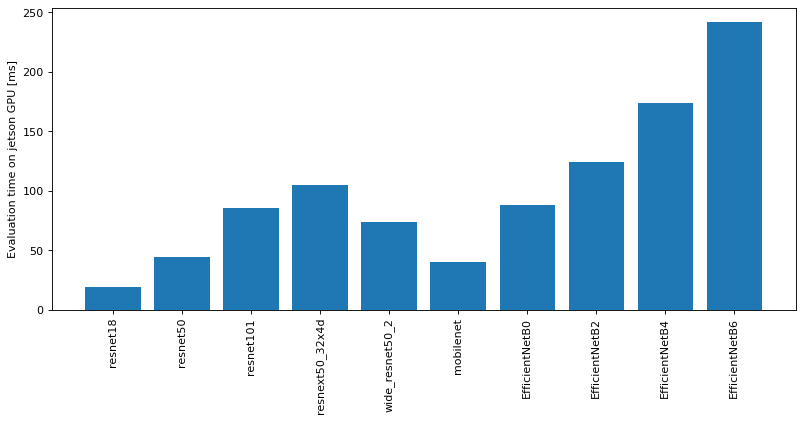

In [88]:
plt.figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')
plt.bar(names,times)
plt.xticks(names, rotation="vertical")
plt.ylabel("Evaluation time on jetson GPU [ms]")

[125.46873470000001,
 126.81801609999998,
 124.1356506,
 126.69264220000001,
 124.3226242,
 123.1237106]

Text(0, 0.5, 'Forward time on T4 Tesla GPU [ms]')

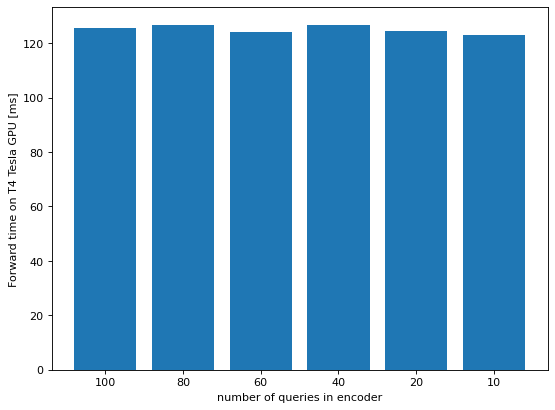

In [89]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(queries_col,list(queries_val[0]))
plt.xlabel("number of queries in encoder")
plt.ylabel("Forward time on T4 Tesla GPU [ms]")